In [ ]:
from algorithm.utils.data.tf.dataimage import DataImage
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import keras
%load_ext tensorboard

In [2]:
normalize = True
mean = 'auto' # 'auto' -> mean_value = [float(1/255), float(1/255), float(1/255)]
mean_value = [float(1/255), float(1/255), float(1/255)]

In [3]:
dataset = DataImage(data_path="..\\Input\\dataset", split='train only', resize=True, height='auto', width='auto', normalize=normalize, mean=mean, name="Electronic components dataset", batch_size=16)

In [4]:
dataset

Electronic components dataset
	Number of points: 2884
	Root location: ..\Input\dataset
	Split: 0
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [5]:
trainset = dataset.get_set(split="train")

In [6]:
# get some random training images
dataiter = iter(trainset)
images, labels = next(dataiter)

In [7]:
images

{'data': <tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
 array([[[[0.10980393, 0.22352943, 0.14509805],
          [0.10980393, 0.22352943, 0.14509805],
          [0.10980393, 0.22352943, 0.14509805],
          ...,
          [0.12034314, 0.23088236, 0.17181374],
          [0.09803922, 0.227451  , 0.16078432],
          [0.09411766, 0.227451  , 0.16078432]],
 
         [[0.10980393, 0.22352943, 0.14509805],
          [0.10980393, 0.22352943, 0.14509805],
          [0.10980393, 0.22352943, 0.14509805],
          ...,
          [0.12103727, 0.23157649, 0.17250787],
          [0.10914522, 0.238557  , 0.17189033],
          [0.10522366, 0.238557  , 0.17189033]],
 
         [[0.09955577, 0.20935969, 0.15053616],
          [0.09955577, 0.20935969, 0.15053616],
          [0.11651636, 0.22632028, 0.16749676],
          ...,
          [0.13676472, 0.23137257, 0.1767157 ],
          [0.11985295, 0.22965688, 0.18259805],
          [0.09877452, 0.21642157, 0.18357845]],
 
         ...,


In [8]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'SOT', b'Rectangular pin', b'IC', b'Rectangular pin',
       b'Not mounted', b'Rectangular pin', b'Not mounted',
       b'Rectangular pin', b'Rectangular pin', b'Ceramic capacitor',
       b'Ceramic capacitor', b'Resistor', b'Ceramic capacitor',
       b'Resistor', b'Rectangular pin', b'Fuse'], dtype=object)>

In [9]:
class_names = dataset.labels

In [10]:
class_names

['Ceramic capacitor',
 'Connector',
 'Diode',
 'Dip Switch',
 'Fuse',
 'IC',
 'Inductor',
 'Jumper',
 'Jumper cut',
 'LED',
 'Minimelf',
 'Not mounted',
 'Optoisolator',
 'Oscillator',
 'Pushbutton',
 'Rectangular pin',
 'Relais',
 'Resistor',
 'Resistor Network',
 'SOT',
 'TO252',
 'Tantalum capacitor']

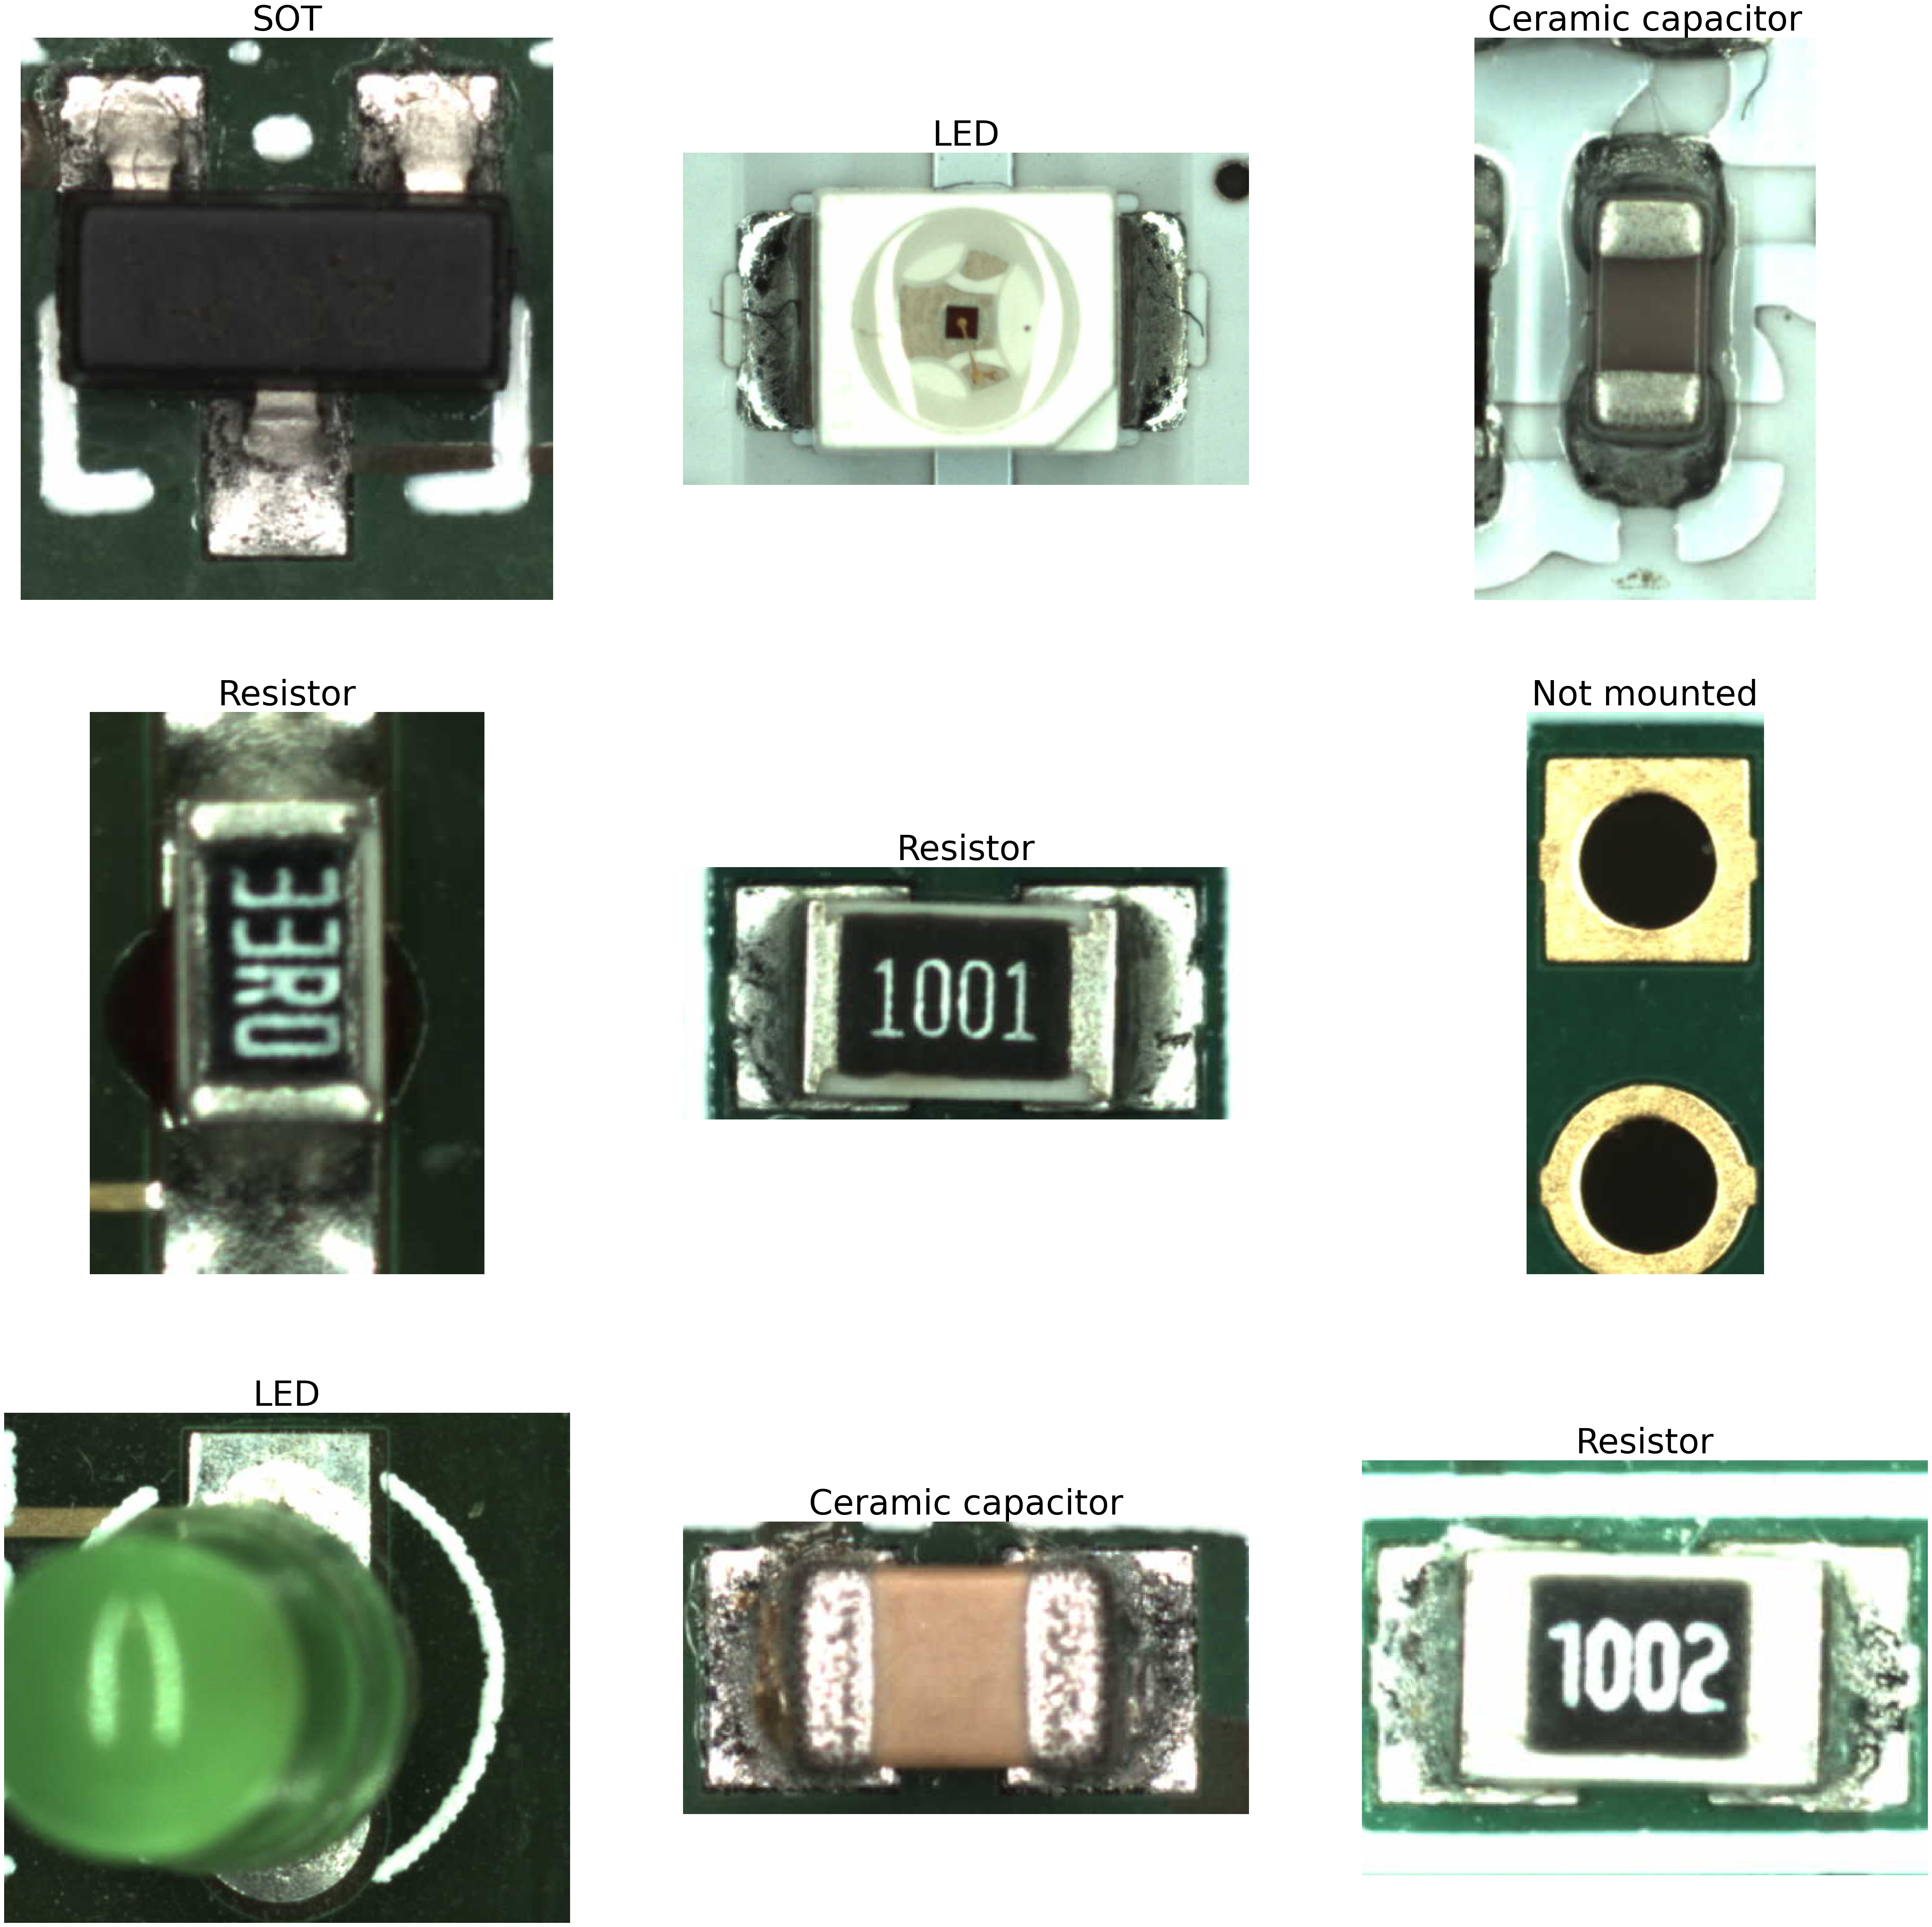

In [11]:
import matplotlib.pyplot as plt
import numpy as np
image_batch, label_batch = next(iter(trainset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    printable_object = dataset.print_item(image_batch['print_object'][i])
    plt.imshow(printable_object)
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [12]:
from algorithm.deep.tf.neural_networks import ResNet2__1

In [13]:
trainset = dataset.apply_one_hot_encoding(trainset)

In [14]:
out_dir = "../out/models/ResNet2__1_3"

In [18]:
model = ResNet2__1(len(class_names),input_shape=(128, 128, 3), field='data')
tb_callback = keras.callbacks.TensorBoard(log_dir=f'{out_dir}/tensorboard_log', histogram_freq=1)

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"],
    run_eagerly=True,
)

In [ ]:
model.fit(trainset, epochs=1, callbacks=[tb_callback])

In [23]:
model.summary()

Model: "res_net2__1_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 4, 4, 2048)        58370944  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 1000)              32769000  
                                                                 
 dense_3 (Dense)             (None, 22)                22022     
                                                                 
 model_1 (Functional)        (None, 22)                91161966  
                                                                 
Total params: 91161966 (347.76 MB)
Trainable params: 32791022 (125.09 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


In [ ]:
model.save(out_dir)

In [ ]:
keras.utils.plot_model(model, f'{out_dir}/ResNet2__1_3.svg', show_shapes=True, show_layer_activations=True, show_layer_names=True)